## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

import numpy as np
from sklearn import datasets
import pandas as pd







# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview

merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

num_of_mice = len(merged_df["Mouse ID"])

num_of_mice


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

many_duplicates = merged_df[merged_df.duplicated(["Mouse ID"])]
many_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merged_df.drop_duplicates(subset=['Mouse ID'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.

len(clean_df["Mouse ID"])


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean,median, variance, standard deviation, and SEM of the tumor volume for each 
# regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

vol_mean = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
vol_median = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
vol_variance = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
vol_std = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
vol_sem = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


summary_df = pd.DataFrame({"Mean": vol_mean, "Median": vol_median, "Variance": vol_variance, "Standard Deviation": vol_std, "SEM": vol_sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each 
#regimen

# Using the aggregation method, produce the same summary statistics in a single line


agg_df = merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

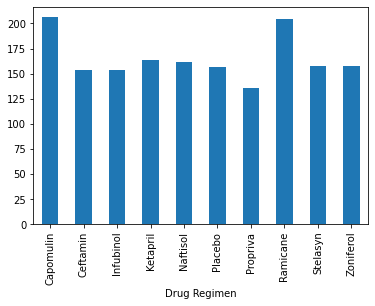

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# new_df = merged_df.groupby("Drug Regimen").count()

# barplot_df = new_df[["Drug Regimen", "Mouse ID"]]

# bp = barplot_df.plot.bar(x='Drug Regimen', y=, rot=0)


merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].nunique().plot(kind='bar')
plt.show()

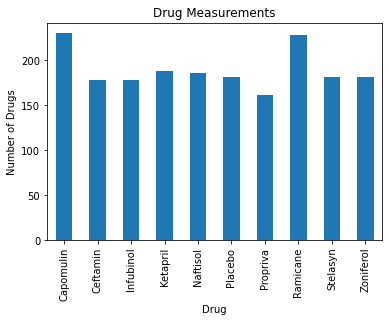

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


drugs = merged_df.groupby('Drug Regimen')

# Counting the drugs
drug_count = drugs['Drug Regimen'].count()

# Creating Chart

drug_chart = drug_count.plot(kind="bar", title="Drug Measurements")
drug_chart.set_xlabel("Drug")
drug_chart.set_ylabel("Number of Drugs")

plt.show()
plt.tight_layout()




<AxesSubplot:title={'center':'Male & Female Mice Percentage'}, ylabel='Mouse ID'>

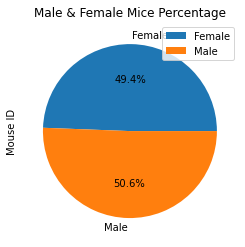

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


pie_chart = merged_df.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID', autopct='%1.1f%%')

plt.title("Male & Female Mice Percentage")
pie_chart




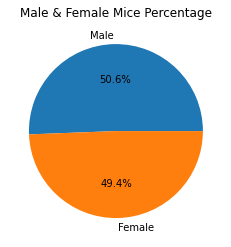

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = merged_df.Sex.value_counts()

plt.pie(gender.values,labels=gender.index,autopct='%1.1f%%')
plt.title('Male & Female Mice Percentage')
plt.show()


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin




# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


top_drugs = merged_df[merged_df["Drug Regimen"].isin(["Infubinol","Capomulin", "Ceftamin", "Ramicane"])]



highest = top_drugs.groupby('Mouse ID').max()['Timepoint']


volume = pd.DataFrame(top_drugs)
combined = pd.merge(volume, top_drugs, on=("Mouse ID","Timepoint"),how="left")


combined.head()



,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Male,21,16,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Male,21,16,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Male,21,16,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Male,21,16,32.997729,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = merged_df["Drug Regimen"].unique()
# merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


  # Locate the rows which contain mice on each drug and get the tumor volumes
    
    for x in treatments
    
        print(x)
        
        
    

    
    # add subset 
    
    
    
    
    
    # Determine outliers using upper and lower bounds
    

quartiles = merged_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    
    
    
    
print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")


    
  

IndentationError: unexpected indent (<ipython-input-14-d5fc2856c0b2>, line 15)

In [ ]:
treatments = merged_df["Drug Regimen"].unique()
treatments

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


mouse = merged_df.loc[merged_df["Mouse ID"] == "s185"]

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])

# Add labels and title to plot
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Tumor Volume vs. Timepoint")

# Display plot
plt.show()









In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_volume = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Volume'})

# Merge average tumor volume onto data_df and drop duplicates
avg_volume = pd.merge(capomulin_df, avg_volume, on='Mouse ID')
final_volume = avg_volume[['Weight (g)', 'Average Volume']].drop_duplicates()
final_volume

x = final_volume["Weight (g)"]
y = final_volume['Average Volume']

plt.scatter(x, y)


plt.xlabel("Weight (g)")
plt.ylabel("Average Volume")
plt.title('Average Tumor Volume vs. Mouse Weight')

plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



x_values = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
y_values = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

print(f"The correlation coefficient between mouse weight and is {round(st.pearsonr(x_values,y_values)[0],2)}")


